# Market Segmentation

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, r2_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, lars_path
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

## Load the data

In [6]:
data = pd.read_csv ('../data/3.12. Example.csv')

In [3]:
df

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

In [5]:
X_scaled

NameError: name 'X_scaled' is not defined

Create a preliminary plot to see if you can spot something

Text(0, 0.5, 'Loyalty')

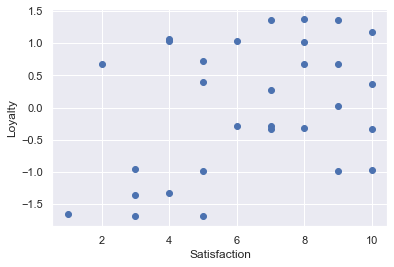

In [7]:
# We are creating a scatter plot of the two variables
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Name your axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [8]:
# Select both features by creating a copy of the data variable
x = data.copy()

## Clustering

In [9]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)
# Fit the data
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [10]:
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

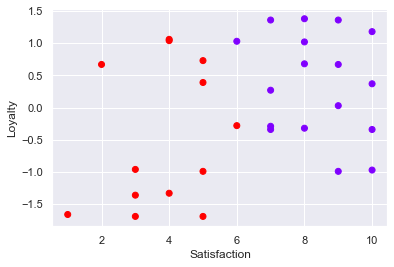

In [11]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

Let's standardize and check the new result

In [12]:
# Import a library which can do that easily
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [13]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.423830011052963,
 4.358871893303257,
 3.8067995963754537]

Text(0, 0.5, 'WCSS')

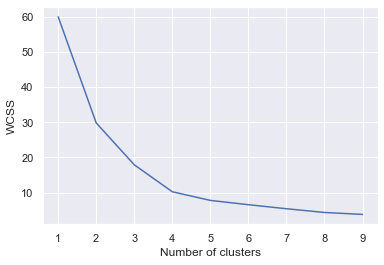

In [14]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [15]:
# Fiddle with K (the number of clusters)
kmeans_new = KMeans(9)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [16]:
# Check if everything seems right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,7
1,6,-0.28,2
2,5,-0.99,7
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,8
6,10,-0.97,4
7,8,-0.32,2
8,8,1.02,6
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

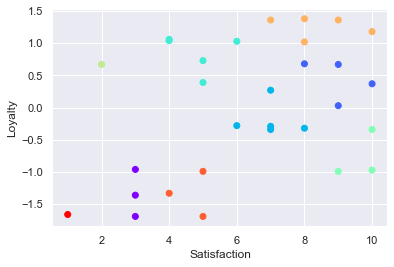

In [17]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')